<a href="https://colab.research.google.com/github/vvvu/potential-chainsaw/blob/main/statistical-learning-method/Chapter%202%20%E6%84%9F%E7%9F%A5%E5%99%A8/Chapter_2_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.1** Minsky与Papert指出：Perceptron因为是线性模型，所以不能表示复杂的函数，如异或（XOR）。验证感知机为什么不能表示异或。

异或函数的输入输出为下表：

|$x_1$| $x_2$|y|
|-|--|-|
| 1 |1| 0   |
| 1   | 0     | 1   |
| 0   | 1 | 1   |
|0|0|0|

所以我们只需要讨论上述几个点是否是线性可分即可，决策平面为横轴是$x_1$，纵轴是$x_2$构成的二维平面：

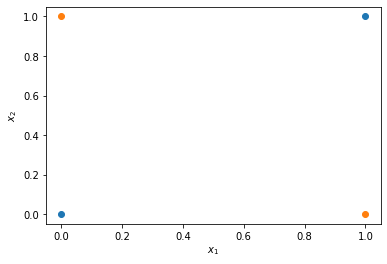

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
y = 0
'''
x1_0 = np.array([1, 0])
x2_0 = np.array([1, 0])

'''
y = 1
'''
x1_1 = np.array([1, 0])
x2_1 = np.array([0, 1])

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

ax.scatter(x = x1_0, y = x2_0)
ax.scatter(x = x1_1, y = x2_1)
plt.show()

根据上图所示，该数据集**不具备线性可分性**，所以Perceptron作为线性模型无法表示异或运算（XOR）

**2.2** 模仿例题2.1，构建从训练集求解Perceptron的例子。

In [63]:
import numpy as np
import random

# Perceptron Implemented in Python

X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])

weights = np.zeros(2)
bias = np.zeros(1)
lr = 1 # learning rate

def isClassified(X, Y, w, b) -> bool:
  '''
  Check if all points are correctly classified
  '''
  for x in X:
    if np.multiply(y, np.add(np.dot(w, x), b)) <= 0:
      return False
  return True

n = len(X)
while True:
  # Random select x from X
  index = random.randint(0, 2)
  x = X[index]
  y = Y[index]
  if np.multiply(y, np.add(np.dot(weights, x), bias)) <= 0:
    weights -= lr * x * y
    bias -= lr * y
  if isClassified(X, Y, weights, bias) == True:
    break

print("w: ", weights, "\nb: ", bias)

w:  [-7. -6.] 
b:  [-2.]


In [64]:
# Perceptron Implemented in Sklearn

from sklearn.linear_model import Perceptron
import numpy as np

X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])

perceptron_model = Perceptron()
perceptron_model.fit(X, Y)
print("w:", perceptron_model.coef_, "\nb:", perceptron_model.intercept_, "\n")

w: [[1. 0.]] 
b: [-2.] 



**2.3** 证明以下定理：样本集线性可分的充分必要条件是正实例点集所构成的凸壳与负实例点集所构成的凸壳互不相交。

凸壳定义为：
设集合$S \subset R^n$是由$R^n$中的$k$个点组成的集合，即$S=\{x_1,x_2,···,x_k\}$。定义S的凸壳为$conv(S)$为

$$
conv(S) = \{x = \sum_{i=1}^k\lambda_ix_i |\sum_{i=1}^k \lambda_i=1, \lambda_i \geq 0, i = 1,2,···,k \}
$$

线性可分定义为：
给定一个数据集

$$
T = \{(x_1,y_1), (x_2,y_2), ···, (x_N,y_N)\}
$$

其中 $x_i \in X = R^n, y_i \in Y = \{+1,-1\}$，如果存在某个超平面$S$能将数据集的正负实例点完全正确地分到超平面的两侧，则称线性可分。也就是说，对于所有$y_i = +1$的实例，有$w·x_i + b > 0$，对所有$y_i = -1$的实例，有$w·x_i + b < 0$

#### 2.3.1 必要性证明：线性可分 => 凸壳互不相交
假设正实例点集为$S_+$，负实例点集为$S_-$，若数据集T是线性可分的，则存在一个超平面将$S_+$和$S_-$完全分离，超平面为：

$$
w · x + b = 0
$$

则对于所有的$S_+$，有

$$
w·x_i + b = \epsilon_i, \text{where } \epsilon_i > 0
$$

则对于所有的$S_-$，有

$$
w·x_i + b = \epsilon_i, \text{where } \eta_i < 0
$$

如果凸壳相交，则一定存在一个点$s \in S_+$且$s \in S_-$，则这个点$s = (x, y)$同时满足

$$
w·x + b = \epsilon > 0
$$
且
$$
w·x + b = \eta < 0
$$

显然不成立。

#### 2.3.2 充分性证明：凸壳互不相交 => 线性可分
定义凸壳之间的最近距离为：
$$
dist(conv(S_+), conv(S_-) = \min \sqrt{(x_+ - x_-)^2 + (y_+ - y_-)^2}, \text{where } (x_+,y_+) \in S_+, (x_-, y_-) \in S_- \\ s_+ = (x_+,y_+),s_- = (x_-,y_-)
$$
因为题目前提为凸壳不相交，所以
$$dist(conv(S_+), conv(S_-) > 0$$

假设现在有一个超平面：
$$
w·x + b = 0
$$

其中
$$
w = s_+ + s_-, b = -\frac{s_+·s_+-s_-·s_-}{2}
$$
代入得，

$$
w·x+b = \frac{dist(x,s_-)^2 - dist(x,s_+)^2}{2}
$$

对于任意在正凸壳中的点$x_+$，显然
$$
w·x_++b > 0
$$
同样的道理，对于任意在的负凸壳中的点$x_-$，有
$$
w·x_-+b < 0
$$
故充分性得证